In [167]:
import pandas as pd

types = {'id':str, 'time':str, 'variable':str, 'value':float}
parse_dates = ['time']
df = pd.read_csv('dataset_mood_smartphone.csv', index_col=0, dtype=types, parse_dates=parse_dates)


## Basic overview of the data

In [168]:
df.head()

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00,mood,6.0
2,AS14.01,2014-02-26 15:00:00,mood,6.0
3,AS14.01,2014-02-26 18:00:00,mood,6.0
4,AS14.01,2014-02-26 21:00:00,mood,7.0
5,AS14.01,2014-02-27 09:00:00,mood,6.0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376912 entries, 1 to 2784435
Data columns (total 4 columns):
id          376912 non-null object
time        376912 non-null datetime64[ns]
variable    376912 non-null object
value       376710 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 14.4+ MB


In [170]:
df.variable.unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

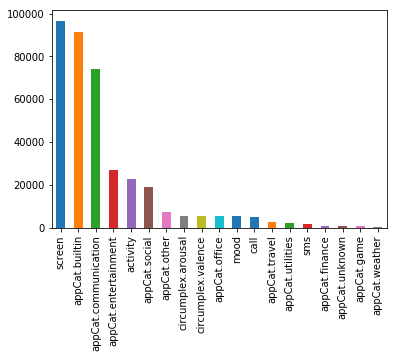

In [171]:
df.variable.value_counts().plot.bar()

In [172]:
df.id.value_counts()

AS14.01    21999
AS14.23    21852
AS14.13    19592
AS14.28    19276
AS14.06    18092
AS14.29    17499
AS14.12    17311
AS14.30    17279
AS14.26    16403
AS14.33    16390
AS14.07    16045
AS14.17    15826
AS14.05    15745
AS14.02    14581
AS14.27    14575
AS14.24    14430
AS14.03    14425
AS14.25    12589
AS14.31    11889
AS14.19    11397
AS14.32    11193
AS14.09    10886
AS14.14     9286
AS14.08     7902
AS14.16     3982
AS14.20     3620
AS14.15     2848
Name: id, dtype: int64

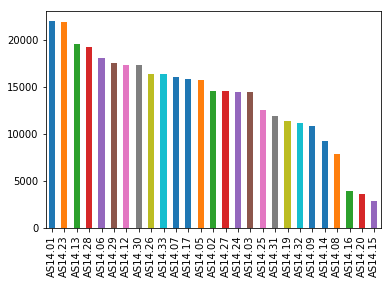

In [173]:
df.id.value_counts().plot.bar()

# for person in df.id.value_counts():
#     print (person)

In [174]:
df.time.unique()

array(['2014-02-26T13:00:00.000000000', '2014-02-26T15:00:00.000000000',
       '2014-02-26T18:00:00.000000000', ...,
       '2014-04-26T10:19:07.434000000', '2014-04-27T00:44:48.450000000',
       '2014-04-07T18:25:14.036000000'], dtype='datetime64[ns]')

## simple time series plots

just some examples, not for actual use

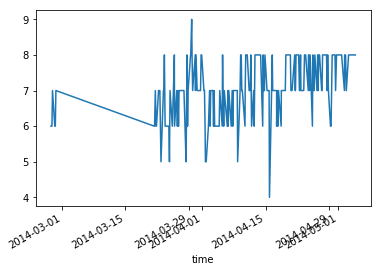

In [175]:
# filter out a single user

df_filtered = df.query('id=="AS14.01"')
# filter out a single variable to plot

df_filtered = df_filtered.query('variable == "mood"')

# set the index to time to make things plottable? not sure why I can't do it otherwise but whatever 
df_filtered.index = df_filtered['time']


ts = pd.Series(df_filtered.value)
# .resample('D', how='mean').loc[df.index].fillna(method='ffill')



ploti = ts.plot()

In [176]:
df.id.unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

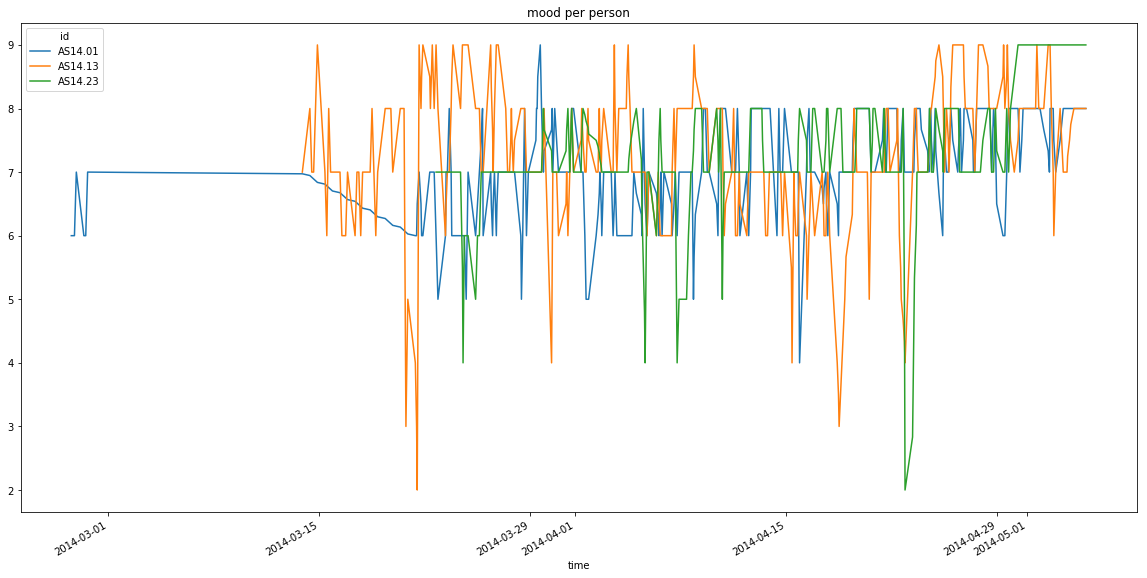

In [177]:
people = ["AS14.01", "AS14.23", "AS14.13"]
variable =  "mood"

temporary = df[(df.variable == variable) & (df.id.isin(people))]



temporary.pivot_table(index='time',columns='id',values='value').interpolate(method='linear').plot(figsize=(20,10), title="mood per person")

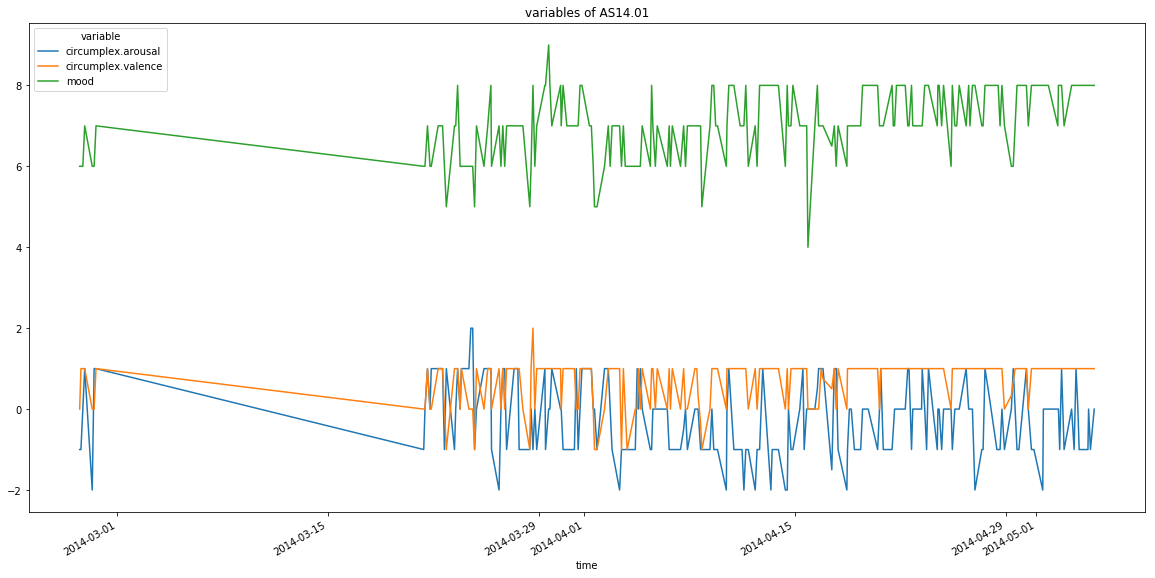

In [178]:
people = ["AS14.01"]

variables = ["mood", "circumplex.valence", "circumplex.arousal"]

temporary = df[(df.id.isin(people)) & df.variable.isin(variables)]

temporary.pivot_table(index='time',columns='variable',values='value').interpolate(method='linear').plot(figsize=(20,10), title="variables of AS14.01")

## Aggregating data into days

This part is very important. Since we only consider time in days it does not make sense to make things more complicated by having many datapoints per day. Naturally we lose information which might be important by doing this. For example, the amount of times the user 'checks' their phone might be indicative of nervousness. However, I don't want to make things complicated.

In [179]:
#  example of resampling just one mood for one person.

people = ["AS14.01"]

variables = ["mood"]


temporary = df[(df.id.isin(people)) & df.variable.isin(variables)]
temporary.set_index('time',inplace=True)
temporary_series = pd.Series(temporary.value)

temporary_series.resample('D').mean()


time
2014-02-26    6.250000
2014-02-27    6.333333
2014-02-28         NaN
2014-03-01         NaN
2014-03-02         NaN
2014-03-03         NaN
2014-03-04         NaN
2014-03-05         NaN
2014-03-06         NaN
2014-03-07         NaN
2014-03-08         NaN
2014-03-09         NaN
2014-03-10         NaN
2014-03-11         NaN
2014-03-12         NaN
2014-03-13         NaN
2014-03-14         NaN
2014-03-15         NaN
2014-03-16         NaN
2014-03-17         NaN
2014-03-18         NaN
2014-03-19         NaN
2014-03-20         NaN
2014-03-21    6.200000
2014-03-22    6.400000
2014-03-23    6.800000
2014-03-24    6.000000
2014-03-25    6.750000
2014-03-26    6.600000
2014-03-27    7.000000
                ...   
2014-04-05    6.800000
2014-04-06    6.500000
2014-04-07    6.500000
2014-04-08    6.600000
2014-04-09    7.400000
2014-04-10    7.400000
2014-04-11    7.000000
2014-04-12    7.250000
2014-04-13    8.000000
2014-04-14    7.200000
2014-04-15    6.400000
2014-04-16    7.200000
2014-0

## using multi-index to make hierarchical series data

I am trying to learn how to manage the data properly so we can place it in the correct format ;)

First we make sure all the data is grouped by DAYS
For this I stole a grouper function from stack overflow

In [1]:
# VERSIE 1

import pandas as pd

types = {'id':str, 'time':str, 'variable':str, 'value':float}
parse_dates = ['time']
df = pd.read_csv('dataset_mood_smartphone.csv', index_col=0, dtype=types, parse_dates=parse_dates)

df.set_index(['id', 'variable', 'time'], inplace=True)

def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(i) for i in [0,1]]
                       +[pd.Grouper(freq='D', level=-1)]).mean())

df_by_day = using_Grouper(df)
df_by_day.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15522 entries, (AS14.01, activity, 2014-03-20 00:00:00) to (AS14.33, sms, 2014-05-29 00:00:00)
Data columns (total 1 columns):
value    15520 non-null float64
dtypes: float64(1)
memory usage: 168.1+ KB


In [4]:
# VERSIE 2
import numpy as np
import pandas as pd

types = {'id':str, 'time':str, 'variable':str, 'value':float}
parse_dates = ['time']
df = pd.read_csv('dataset_mood_smartphone.csv', index_col=0, dtype=types, parse_dates=parse_dates)

df.set_index(['id', 'variable', 'time'], inplace=True)

def using_Grouper(df):
    level_values = df.index.get_level_values
    a = [level_values(i) for i in [0,1]]
    b = [pd.Grouper(freq='D', level='time')]
    c = [pd.Grouper(level='variable')]

    c = df.groupby(a+b)

#     d = c.mean()
    d = c.agg([np.sum, np.mean])

    return d

df_by_day = using_Grouper(df)

to_mean = ["mood", "circumplex.arousal", "circumplex.valence"]


df_by_day['value2'] = np.where(df_by_day.index.isin(to_mean, level='variable'), df_by_day['value']['mean'], df_by_day['value']['sum'])
# df_by_day.loc[("AS14.01", "mood")]
df_by_day.drop('value', axis=1, inplace=True)
df_by_day.rename(columns={'value2':'value'}, inplace=True)
df_by_day.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15522 entries, (AS14.01, activity, 2014-03-20 00:00:00) to (AS14.33, sms, 2014-05-29 00:00:00)
Data columns (total 1 columns):
(value, )    15520 non-null float64
dtypes: float64(1)
memory usage: 168.1+ KB


Now we create a multi-index. We set the hierarchy to be: ID -> Time -> variables: value

However we see that there are many missing values. For example, if the user does not input "mood" for a day that value will not be displayed. 

In [5]:
# df_by_day.reset_index()

# 

temper = df_by_day.reset_index()

temper.set_index(['id', 'time', 'variable'], inplace=True)
# temper.set_index(['id', 'variable', 'time'], inplace=True)

# temper.loc[("AS14.01", "2014-03-20")]
# temper = temper.loc[("AS14.01")].sort_index(level="time")
temper = temper.sort_index(level=["id", "time"])
temper
# temper.loc[("AS14.01")]


value
                                                    
id      time       variable                         
AS14.01 2014-02-17 call                     2.000000
        2014-02-18 call                     1.000000
        2014-02-19 call                     7.000000
                   sms                      2.000000
        2014-02-20 call                     2.000000
                   sms                      3.000000
        2014-02-21 sms                      1.000000
        2014-02-22 call                     2.000000
                   sms                      1.000000
        2014-02-25 call                     3.000000
        2014-02-26 call                     1.000000
                   circumplex.arousal      -0.250000
                   circumplex.valence       0.750000
                   mood                     6.250000
                   sms                      2.000000
        2014-02-27 circumplex.arousal       0.000000
                   circumplex.valence       0.333333
                   mood                     6.333333
        2014-02-28 call                     4.000000
        2014-03-01 sms                      1.000000
        2014-03-03 call                     1.000000
        2014-03-05 call                     1.000000
        2014-03-06 call                     1.000000
        2014-03-07 call                     5.000000
        2014-03-10 call                     1.000000
        2014-03-11 call                     3.000000
        2014-03-12 call                     7.000000
                   sms                      1.000000
        2014-03-13 call                     4.000000
        2014-03-14 call                     3.000000
...                                              ...
AS14.33 2014-05-29 appCat.builtin         400.034000
                   appCat.communication   435.105000
                   appCat.entertainment   136.738000
                   appCat.other            29.202000
                   appCat.social         1789.922000
                   appCat.travel            0.939000
                   appCat.utilities         3.199000
                   call                     5.000000
                   circumplex.arousal      -1.333333
                   circumplex.valence       1.000000
                   mood                     7.000000
                   screen                3569.341000
                   sms                      1.000000
        2014-05-30 activity                 4.050925
                   appCat.builtin        3044.030000
                   appCat.communication  1670.842000
                   appCat.entertainment   260.220000
                   appCat.other            52.610000
                   appCat.social         3166.409000
                   appCat.travel         1052.648000
                   appCat.unknown           8.072000
                   appCat.utilities       232.825000
                   call                     4.000000
                   circumplex.arousal      -0.800000
                   circumplex.valence      -0.400000
                   mood                     6.800000
                   screen                9497.646999
        2014-05-31 circumplex.arousal      -2.000000
                   circumplex.valence       1.000000
                   mood                     7.000000

[15522 rows x 1 columns]

## handling missing missing values

To create data with added missing values (if we wanted for example to have evenly sized vectors for each day) we would have to make an empty multi-index as above with all possible combinations and set all of their values to NaN.

I follow these instructions to do this: https://medium.com/when-i-work-data/using-pandas-multiindex-from-product-to-fill-in-missing-data-43c3cfe9cf39

In [6]:
from datetime import datetime
import numpy as np
# both of these should produce the same date-range
date_range = pd.date_range(
    start="2014-02-17",
    end="2014-06-9",
    freq='D'
)

date_range = temper.index.unique(level='time')
unique_id = temper.index.unique(level='id')
unique_variables = temper.index.unique(level='variable')

blank_dataframe = (
    pd.MultiIndex
    .from_product(
        iterables=[unique_id, date_range, unique_variables],
        names=['id', 'time', 'variable']
    )
)
blank_dataframe.values[:5]

array([('AS14.01', Timestamp('2014-02-17 00:00:00'), 'call'),
       ('AS14.01', Timestamp('2014-02-17 00:00:00'), 'sms'),
       ('AS14.01', Timestamp('2014-02-17 00:00:00'), 'circumplex.arousal'),
       ('AS14.01', Timestamp('2014-02-17 00:00:00'), 'circumplex.valence'),
       ('AS14.01', Timestamp('2014-02-17 00:00:00'), 'mood')],
      dtype=object)

In [7]:
temper = temper.reindex(blank_dataframe)

temper.head()

value
                                           
id      time       variable                
AS14.01 2014-02-17 call                 2.0
                   sms                  NaN
                   circumplex.arousal   NaN
                   circumplex.valence   NaN
                   mood                 NaN

In [8]:
temper.index.unique(level='id')

Index(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'],
      dtype='object', name='id')

## Creating dataset for actual model use

Once we have properly formatted the data into users, days, variables we can create labeled data. The data format is quite simple (see figure 2 of the assignment). Each datapoint will contain 5 + 1 days. The last day will be the label/prediction. Naturally, we need to keep missing data in mind. How do we go about this? Interpolate? Throw away?

The format is also important. I think the best is to make a tuple (Matrix, mood). The matrix will be 5 column vectors representing the 5 days. Each vector will contain the variables for that day. The second value in the tuple will be the average mood for the subsequent day and will also serve as the arget/label for our supervised data.  

In [9]:
n_days = 5
a = [13, 2, 3, 4, 5,45]
for ibin in [range(i, i+n_days) for i in range(len(a)-n_days+1)]:
    for i in ibin:
        print(a[i])
    print(" sdfds" )

13
2
3
4
5
 sdfds
2
3
4
5
45
 sdfds


In [19]:
def create_instance_dataset(dataset):
    n_days = 3
    instance_dataset = []
    for person in dataset.index.unique(level='id'):
        series = dataset.loc[(person, slice(None))].unstack()
        days_count = len(series)
        series = series.transpose()
        for i in range(days_count-n_days):
            target_day = series.columns[i+n_days]
            target = series.loc[('value', '', 'mood'), target_day]
            interval = series.loc[:, series.columns[i:i+n_days]]
            instance_dataset.append((person, target_day, interval, target))
    return instance_dataset
create_instance_dataset(temper)

[('AS14.01',
  Timestamp('2014-02-20 00:00:00'),
  time                         2014-02-17  2014-02-18  2014-02-19
         variable                                                
  value  activity                     NaN         NaN         NaN
         appCat.builtin               NaN         NaN         NaN
         appCat.communication         NaN         NaN         NaN
         appCat.entertainment         NaN         NaN         NaN
         appCat.finance               NaN         NaN         NaN
         appCat.game                  NaN         NaN         NaN
         appCat.office                NaN         NaN         NaN
         appCat.other                 NaN         NaN         NaN
         appCat.social                NaN         NaN         NaN
         appCat.travel                NaN         NaN         NaN
         appCat.unknown               NaN         NaN         NaN
         appCat.utilities             NaN         NaN         NaN
         appCat.weather    